In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [4]:
# Load the dataset
df = pd.read_csv('../data/complaints.csv')

/tmp/ipykernel_6859/4221452670.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/complaints.csv')


In [5]:
df

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9609792,2016-09-08,Credit reporting,NaN,Unable to get credit report/credit score,Problem getting my free annual report,NaN,NaN,"EQUIFAX, INC.",FL,32853,NaN,Consent not provided,Web,2016-09-08,Closed with explanation,Yes,Yes,2102374
9609793,2022-06-06,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,"EQUIFAX, INC.",CA,93638,NaN,Consent not provided,Web,2022-06-06,Closed with explanation,Yes,NaN,5637858
9609794,2016-07-14,Credit reporting,NaN,Unable to get credit report/credit score,Problem getting report or credit score,NaN,NaN,"EQUIFAX, INC.",NJ,08620,"Older American, Servicemember",NaN,Phone,2016-07-14,Closed with explanation,Yes,No,2012835
9609795,2014-03-03,Credit reporting,NaN,Improper use of my credit report,Report improperly shared by CRC,NaN,NaN,"EQUIFAX, INC.",NJ,08759,NaN,NaN,Web,2014-03-04,Closed with explanation,Yes,No,740118


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 1.3+

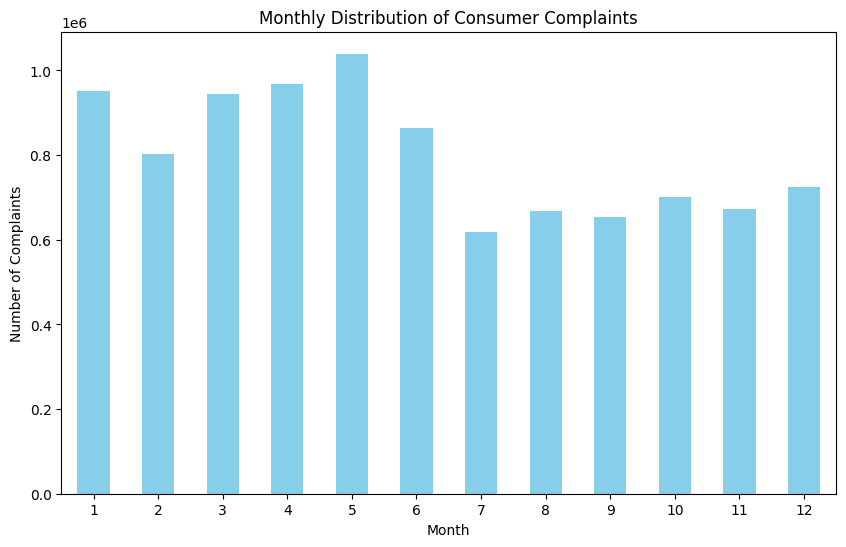

In [7]:
df['Date received'] = pd.to_datetime(df['Date received'])

monthly_complaints = df.groupby(df['Date received'].dt.month)['Complaint ID'].count()

# Plot monthly complaints
plt.figure(figsize=(10, 6))
monthly_complaints.plot(kind='bar', color='skyblue')
plt.title('Monthly Distribution of Consumer Complaints')
plt.xlabel('Month')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=0)
plt.show()

/tmp/ipykernel_6859/2594467184.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_complained_product_issues.sort_values(by='count', ascending=False, inplace=True)


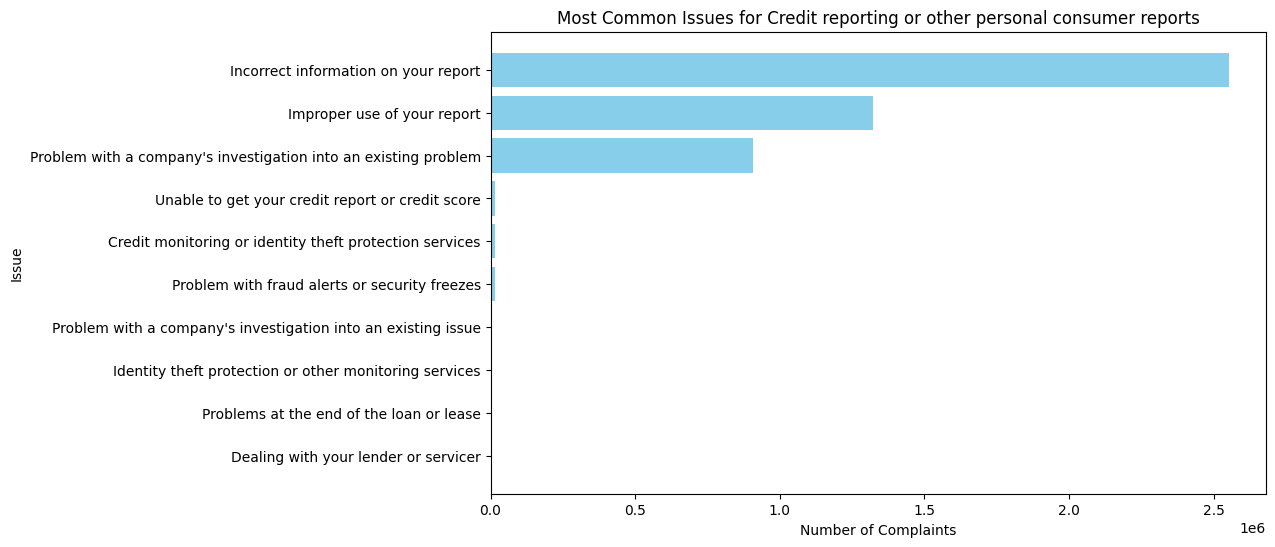

In [8]:
product_issue_counts = df.groupby(['Product', 'Issue']).size().reset_index(name='count')

most_complained_product = product_issue_counts.groupby('Product')['count'].sum().idxmax()
most_complained_product_issues = product_issue_counts[product_issue_counts['Product'] == most_complained_product]

plt.figure(figsize=(10, 6))
most_complained_product_issues.sort_values(by='count', ascending=False, inplace=True)
top_issues = most_complained_product_issues.head(10)  # Display top 10 issues
plt.barh(top_issues['Issue'], top_issues['count'], color='skyblue')
plt.title(f'Most Common Issues for {most_complained_product}')
plt.xlabel('Number of Complaints')
plt.ylabel('Issue')
plt.gca().invert_yaxis()
plt.show()

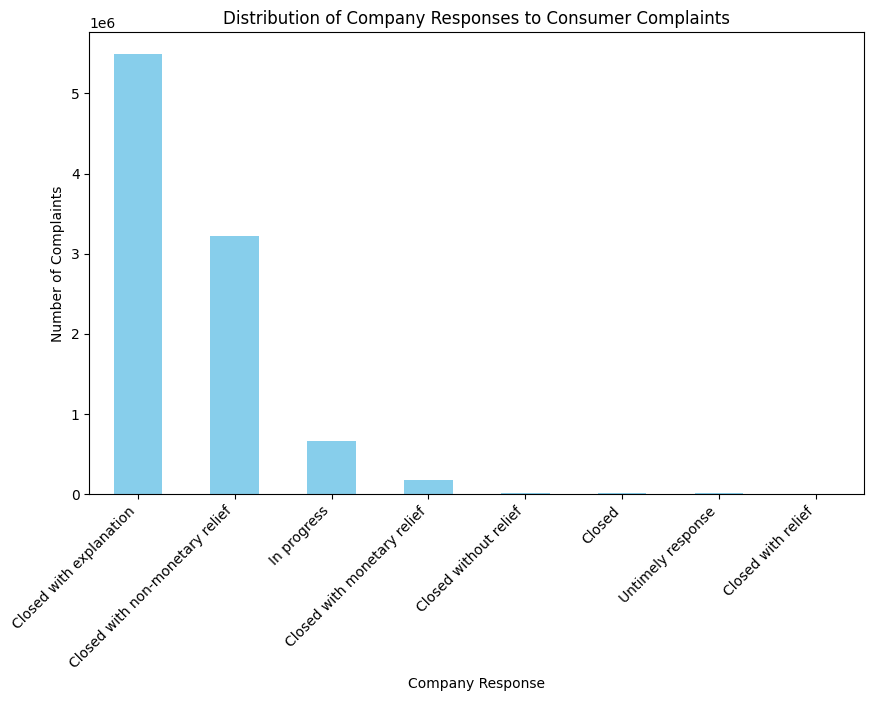

In [9]:
company_response_counts = df['Company response to consumer'].value_counts()

plt.figure(figsize=(10, 6))
company_response_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Company Responses to Consumer Complaints')
plt.xlabel('Company Response')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45, ha='right')
plt.show()

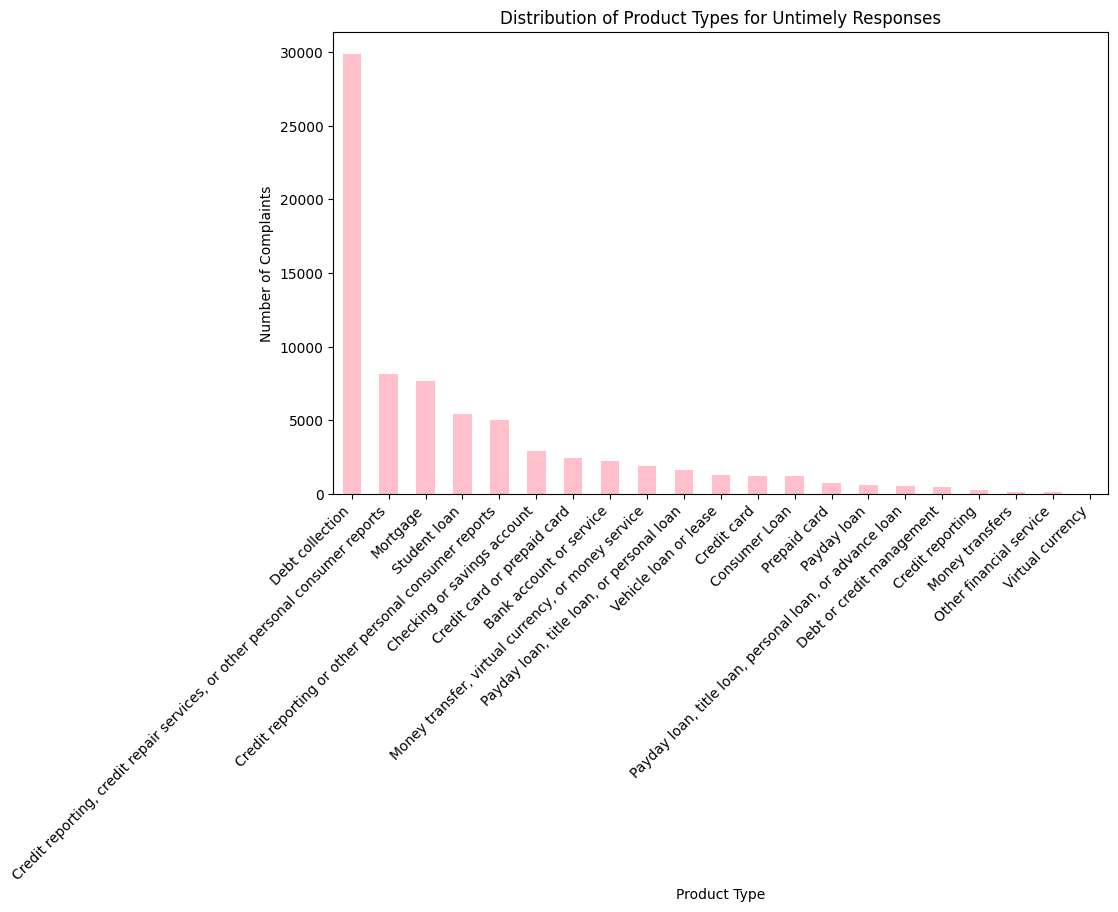

In [10]:
untimely_complaints = df[df['Timely response?'] == 'No']
plt.figure(figsize=(10, 6))
untimely_complaints['Product'].value_counts().plot(kind='bar', color='pink')
plt.title('Distribution of Product Types for Untimely Responses')
plt.xlabel('Product Type')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45, ha='right')
plt.show()

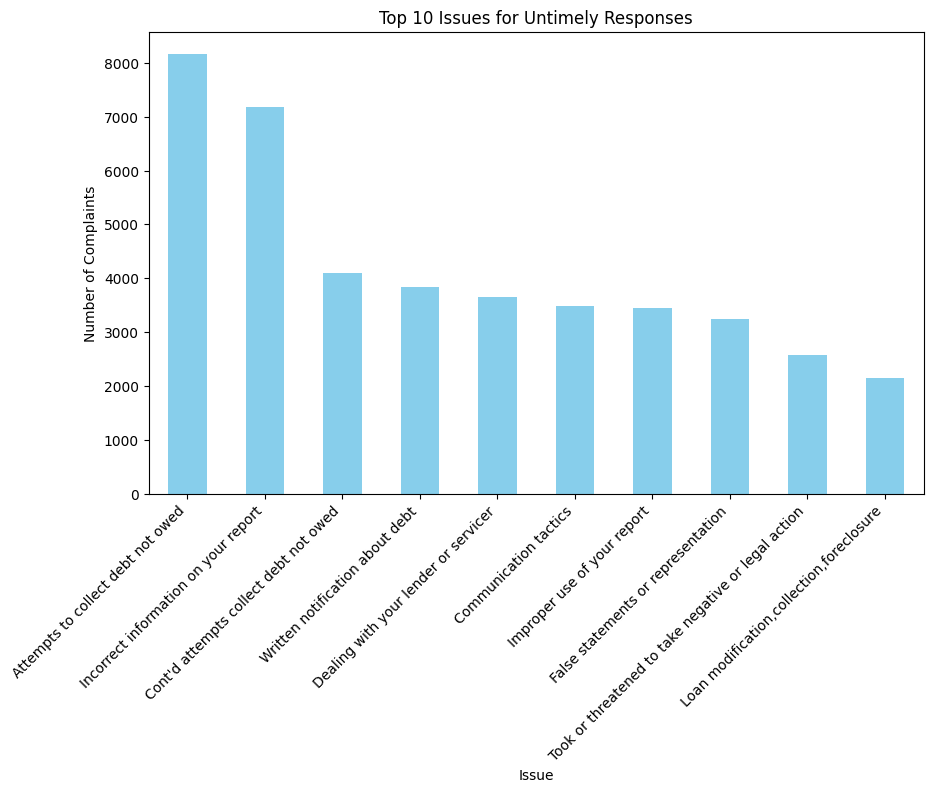

In [11]:
plt.figure(figsize=(10, 6))
untimely_complaints['Issue'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Issues for Untimely Responses')
plt.xlabel('Issue')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45, ha='right')
plt.show()

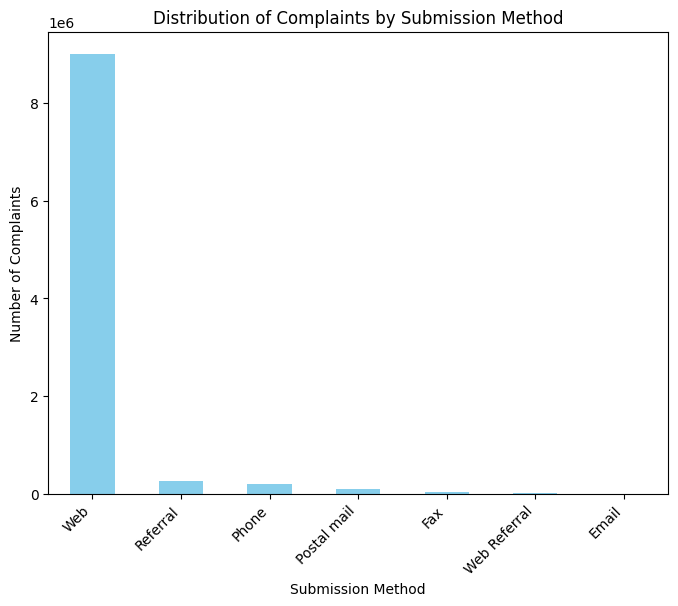

In [12]:
submitted_via_counts = df['Submitted via'].value_counts()
plt.figure(figsize=(8, 6))
submitted_via_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Complaints by Submission Method')
plt.xlabel('Submission Method')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45, ha='right')
plt.show()

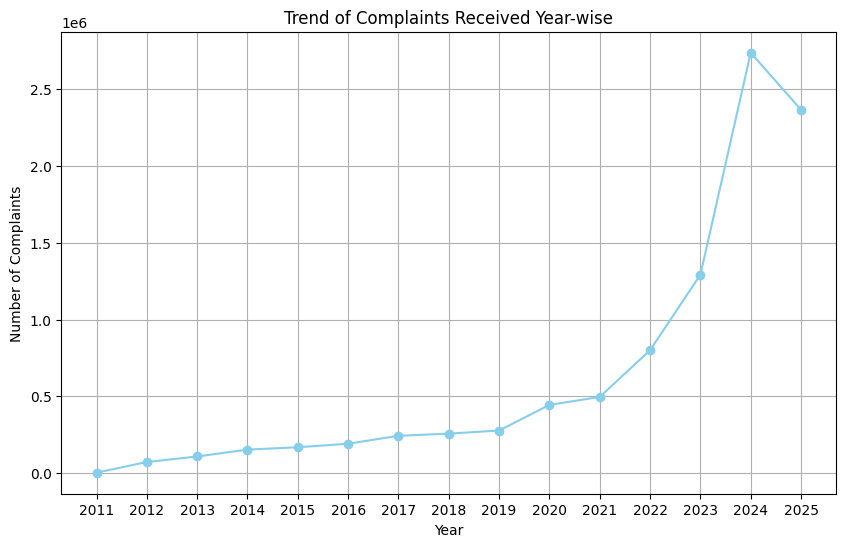

In [13]:
df['Year'] = pd.to_datetime(df['Date received']).dt.year
yearly_complaints = df.groupby('Year').size()
plt.figure(figsize=(10, 6))
plt.plot(yearly_complaints.index, yearly_complaints.values, marker='o', color='skyblue', linestyle='-')
plt.title('Trend of Complaints Received Year-wise')
plt.xlabel('Year')
plt.ylabel('Number of Complaints')
plt.xticks(yearly_complaints.index)
plt.grid(True)
plt.show()

/tmp/ipykernel_6859/906932657.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Timely Response', bbox_to_anchor=(1.05, 1), loc='upper left')


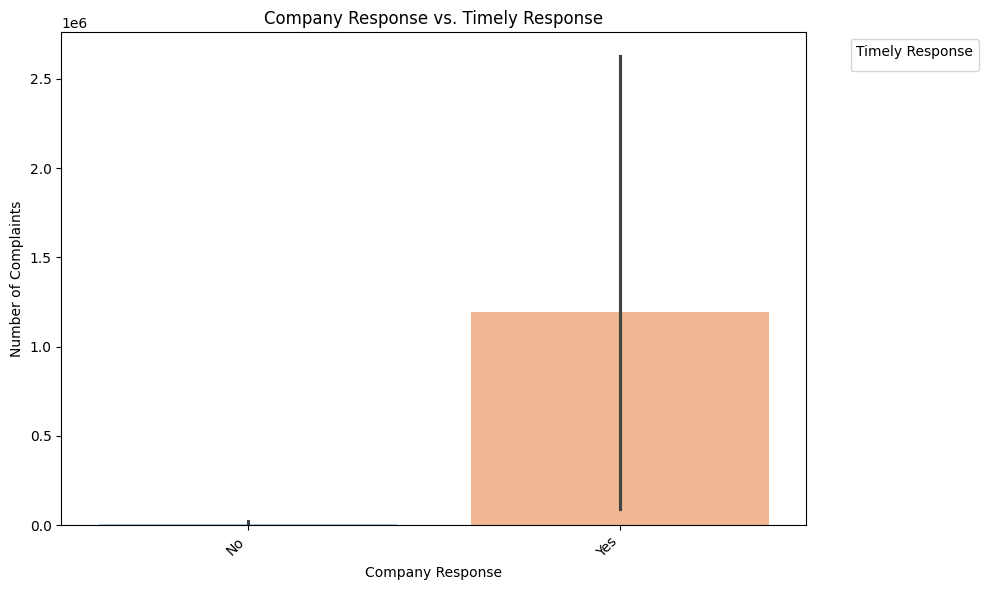

In [14]:
response_counts = df.groupby(['Company response to consumer', 'Timely response?']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 6))
sns.barplot(data=response_counts, palette='pastel')
plt.title('Company Response vs. Timely Response')
plt.xlabel('Company Response')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Timely Response', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Product
Credit reporting or other personal consumer reports                             4834855
Credit reporting, credit repair services, or other personal consumer reports    2163857
Debt collection                                                                  799197
Mortgage                                                                         422254
Checking or savings account                                                      291178
Credit card                                                                      226686
Credit card or prepaid card                                                      206369
Money transfer, virtual currency, or money service                               145066
Credit reporting                                                                 140429
Student loan                                                                     109717
Bank account or service                                                           86205
Vehicle loan or lease   

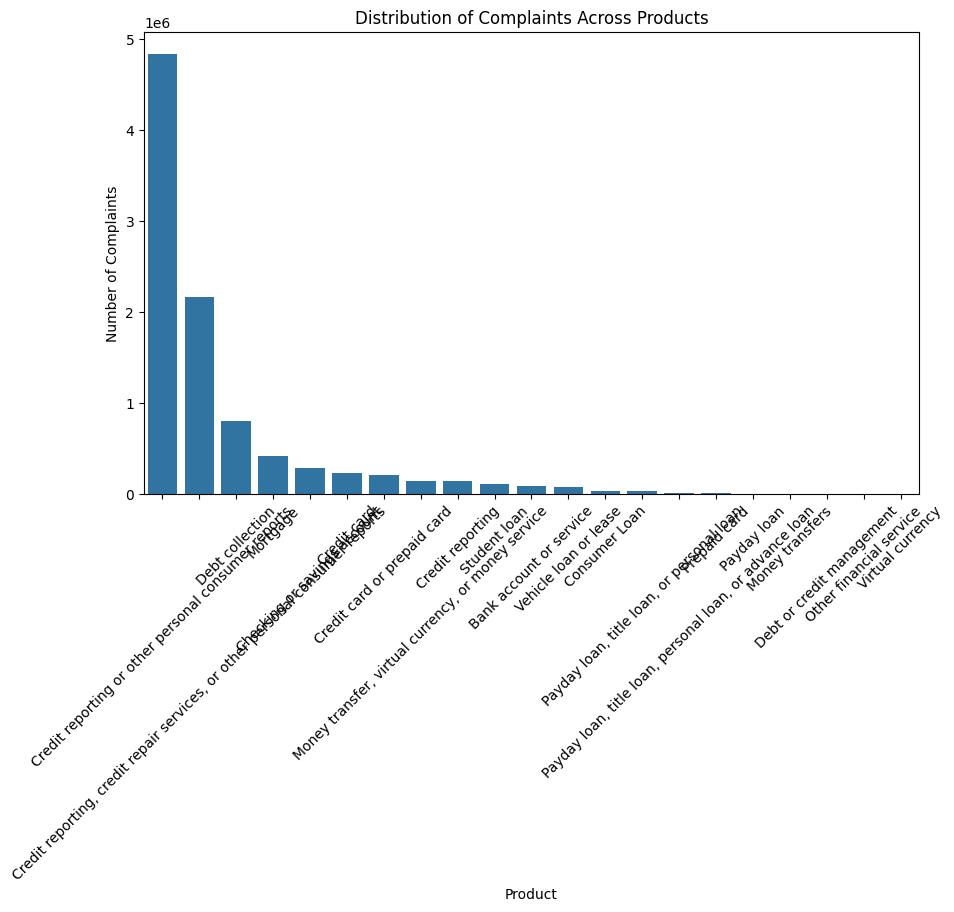

In [15]:
product_counts = df['Product'].value_counts()
print(product_counts)
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=product_counts.index, y=product_counts.values)
plt.title('Distribution of Complaints Across Products')
plt.xlabel('Product')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.show()

Consumer complaint narrative
True     6629041
False    2980756
Name: count, dtype: int64


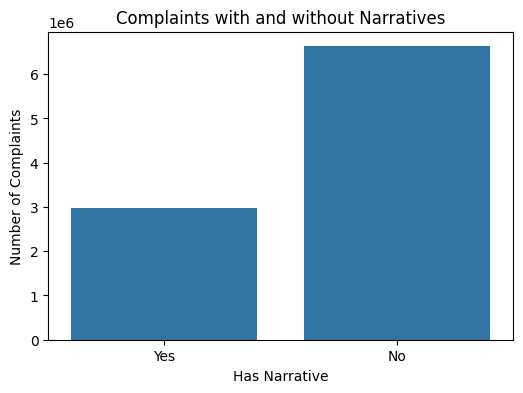

In [16]:
narrative_counts = df['Consumer complaint narrative'].isnull().value_counts()
print(narrative_counts)

# Visualization
plt.figure(figsize=(6, 4))
sns.barplot(x=narrative_counts.index, y=narrative_counts.values)
plt.title('Complaints with and without Narratives')
plt.xlabel('Has Narrative')
plt.ylabel('Number of Complaints')
plt.xticks(ticks=[0, 1], labels=['Yes', 'No'])
plt.show()

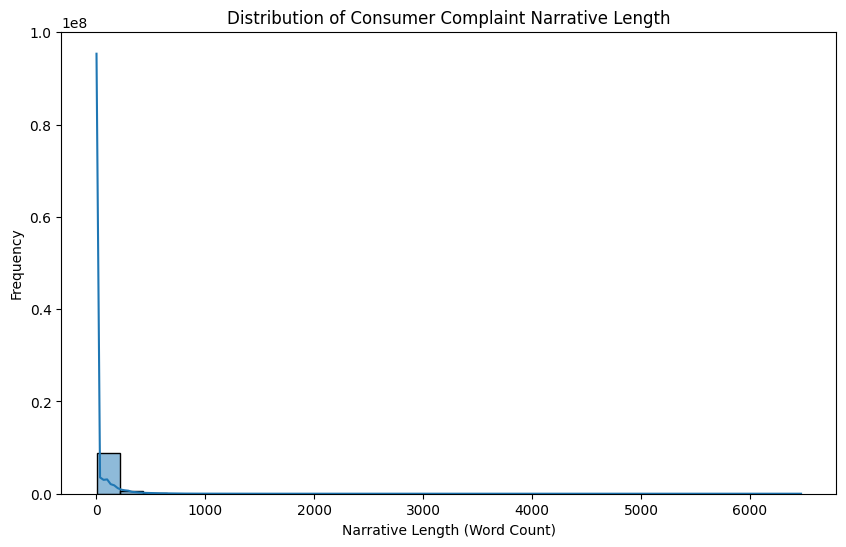

In [17]:
# 2. Calculate and visualize the length of Consumer complaint narrative
df['narrative_length'] = df['Consumer complaint narrative'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10, 6))
sns.histplot(df['narrative_length'], bins=30, kde=True)
plt.title('Distribution of Consumer Complaint Narrative Length')
plt.xlabel('Narrative Length (Word Count)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df['narrative_length'] = df['Consumer complaint narrative'].str.split().str.len()
plt.figure(figsize=(10, 6))
sns.histplot(df['narrative_length'], bins=30, kde=True)
plt.title('Distribution of Complaint Narrative Lengths')
plt.xlabel('Number of Words in Narrative')
plt.ylabel('Frequency')
plt.show()

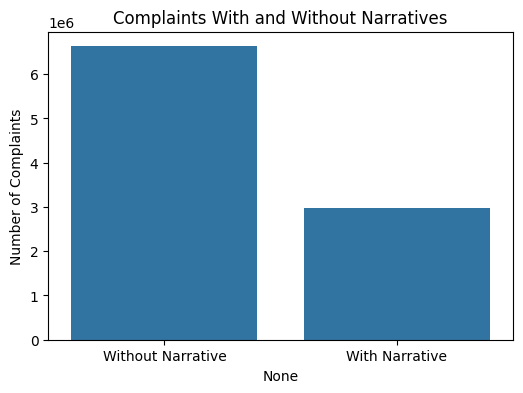

In [ ]:
# 3. Identify number of complaints with and without narratives
narrative_counts = df['Consumer complaint narrative'].notnull().value_counts()
narrative_counts.index = ['Without Narrative', 'With Narrative']
plt.figure(figsize=(6, 4))
sns.barplot(x=narrative_counts.index, y=narrative_counts.values)
plt.title('Complaints With and Without Narratives')
plt.ylabel('Number of Complaints')
plt.show()

In [ ]:
# Filter for specified products and remove empty narratives
products_of_interest = ['Credit card', 'Personal loan', 'Buy Now, Pay Later', 'Savings account', 'Money transfers']
filtered_df = df[df['Product'].isin(products_of_interest) & df['Consumer complaint narrative'].notnull()]

# Clean the narrative text
def clean_text(text):
    text = text.lower()  # Lowercase
    text = ''.join(char for char in text if char.isalnum() or char.isspace())  # Remove special characters
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    return text

filtered_df['cleaned_narrative'] = filtered_df['Consumer complaint narrative'].apply(clean_text)

/tmp/ipykernel_17815/2019452632.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['cleaned_narrative'] = filtered_df['Consumer complaint narrative'].apply(clean_text)


In [ ]:
filtered_df

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,narrative_length
12237,2025-06-13,Credit card,Store credit card,Getting a credit card,Card opened without my consent or knowledge,A XXXX XXXX card was opened under my name by a...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,78230,Servicemember,Consent provided,Web,2025-06-13,Closed with non-monetary relief,Yes,NaN,14069121,91
13280,2025-06-12,Credit card,General-purpose credit card or charge card,"Other features, terms, or problems",Other problem,"Dear CFPB, I have a secured credit card with c...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",NY,11220,NaN,Consent provided,Web,2025-06-13,Closed with monetary relief,Yes,NaN,14047085,156
13506,2025-06-12,Credit card,General-purpose credit card or charge card,Incorrect information on your report,Account information incorrect,I have a Citi rewards cards. The credit balanc...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",IL,60067,NaN,Consent provided,Web,2025-06-12,Closed with explanation,Yes,NaN,14040217,233
13955,2025-06-09,Credit card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,b'I am writing to dispute the following charge...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,78413,Older American,Consent provided,Web,2025-06-09,Closed with monetary relief,Yes,NaN,13968411,454
14249,2025-06-09,Credit card,General-purpose credit card or charge card,Problem when making payments,Problem during payment process,"Although the account had been deemed closed, I...",Company believes it acted appropriately as aut...,Atlanticus Services Corporation,NY,11212,Older American,Consent provided,Web,2025-06-09,Closed with monetary relief,Yes,NaN,13965746,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9600696,2017-02-01,Credit card,NaN,APR or interest rate,NaN,My husband and I attended a XXXX XXXX XXXX tim...,Company has responded to the consumer and the ...,BARCLAYS BANK DELAWARE,NJ,08610,NaN,Consent provided,Web,2017-02-01,Closed with monetary relief,Yes,No,2323561,224
9600751,2017-01-15,Credit card,NaN,Unsolicited issuance of credit card,NaN,I am an infrequent user of PayPal. I only use ...,NaN,"Paypal Holdings, Inc",IL,60126,NaN,Consent provided,Web,2017-01-18,Closed with explanation,Yes,No,2290909,399
9600903,2017-03-22,Credit card,NaN,Other,NaN,I have been doing business with Barclay Bank f...,Company has responded to the consumer and the ...,BARCLAYS BANK DELAWARE,CT,06460,NaN,Consent provided,Web,2017-03-22,Closed with monetary relief,Yes,No,2400431,260
9601617,2015-10-16,Credit card,NaN,Credit determination,NaN,"Defamation of Character, False Credit Reportin...",NaN,JPMORGAN CHASE & CO.,MN,55987,NaN,Consent provided,Web,2015-10-16,Closed with explanation,Yes,Yes,1610424,444


In [ ]:
filtered_df.to_csv('../data/filtered_complaints.csv', index=False)